<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/3_Neural_Network_Regressions_with_Tensorflow/Neural_Network_Regression_with_Tensorflow_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A Larger Example**

In [1]:
#Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as lot


In [2]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* In the above table Charges is the dependent variable
* The rest of the columns are independent variable for our regression problem



In [3]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

* Few columns (features) seems to be of different data type. We need to create a numerical encoding. We can use one hot encoding.

In [4]:
#Lets try one hot encoding our data frame so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
#Create X and y values (Features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

#View x and y
X.head()

y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [6]:
# Create a training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [7]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [8]:
#Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10178.1240 - mae: 10178.1240
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7712.1973 - mae: 7712.1973
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7277.8774 - mae: 7277.8774
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7826.9819 - mae: 7826.9819
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7812.0981 - mae: 7812.0981
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7840.7349 - mae: 7840.7349
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7820.4712 - mae: 7820.4712
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7707.4502 - mae: 7707.4502
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7609.8940 - mae: 7609.8940
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7264.7119 - mae: 7264.7119
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7562.7993 - mae: 7562.7993
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [9]:
# Check the results of the insurance models on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9832.9492 - mae: 9832.9492    


[9543.400390625, 9543.400390625]

In [10]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

To (try) improve our model. We will do 2 experiments.
1. Add extra layer with more hidden units
2. Train for longer
3.Your own experiment.

In [11]:
# Right now the model is not performing well. Lets try to improve it.
tf.random.set_seed(42)

#1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model. SGD Optimizer didnt give good result. So moved to Adam
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13268.2402 - mae: 13268.2402
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13137.5166 - mae: 13137.5166
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12869.8613 - mae: 12869.8613
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12327.4844 - mae: 12327.4844
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11361.0840 - mae: 11361.0840
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9979.8027 - mae: 9979.8027  
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8529.3652 - mae: 8529.3652
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7595.7402 - mae: 7595.7402
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7394.4170 - mae: 7394.4170
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7360.1357 - mae: 7360.1357
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7339.2578 - mae: 7339.2578
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [12]:
#Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3474.5271 - mae: 3474.5271  


[3407.659423828125, 3407.659423828125]

In [13]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9832.9492 - mae: 9832.9492   


[9543.400390625, 9543.400390625]

In [14]:
#Set random set
tf.random.set_seed(42)

#1. Create a model 3
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13295.8682 - mae: 13295.8682
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13199.3047 - mae: 13199.3047
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12995.3008 - mae: 12995.3008
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12547.3506 - mae: 12547.3506
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11684.8926 - mae: 11684.8926
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10345.1689 - mae: 10345.1689
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8838.4600 - mae: 8838.4600
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7733.6460 - mae: 7733.6460
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7427.7349 - mae: 7427.7349
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7387.3203 - mae: 7387.3203
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7366.5352 - mae: 7366.5352
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [15]:
#EValuate our 3rd model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5216.6968 - mae: 5216.6968  


[5056.1318359375, 5056.1318359375]

In [16]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9832.9492 - mae: 9832.9492   


[9543.400390625, 9543.400390625]

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5017.0884 - mae: 5017.0884
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4954.2085 - mae: 4954.2085
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4887.2720 - mae: 4887.2720
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4818.1724 - mae: 4818.1724
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4744.6328 - mae: 4744.6328
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4670.0835 - mae: 4670.0835
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4588.6343 - mae: 4588.6343
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4503.1572 - mae: 4503.1572
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4416.0581 - mae: 4416.0581
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4321.4385 - mae: 4321.4385
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4232.4214 - mae: 4232.4214
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Text(0.5, 0, 'epochs')

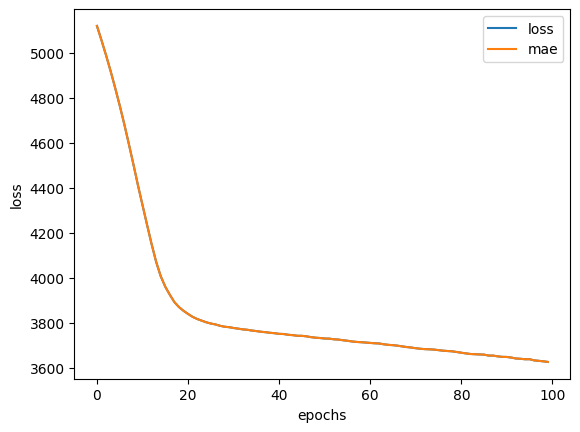

In [17]:
#Plot history (also known as a loss curve or a trianing curve)
# Assign the return value of fit to history
history = insurance_model_3.fit(X_train, y_train, epochs=100) # Assuming you want to plot history for insurance_model_3

pd.DataFrame(history.history).plot()
import matplotlib.pyplot as plt #Import matplotlib.pyplot
plt.ylabel("loss")
plt.xlabel("epochs")

** How long should you train a model for **

It depends on the problem you are working on, however many people have asked for questions before. So tensorflow has a solution. Its called the Early stopping callback https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping which is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.